# Convolutional neural network

## Parameters

In [1]:
import torch

sobel_filter = torch.tensor([
    [1.0, 0, -1.0],
    [2.0, 0, -2.0],
    [1.0, 0.0, -1.0]
])

bias = 0.0

## Random image (9, 9)

with each value within the range of 0-1

In [2]:
input_order = 9
image = torch.rand(1, 1, input_order, input_order)

print(image)

tensor([[[[0.5841, 0.4447, 0.5830, 0.2564, 0.6325, 0.7389, 0.6928, 0.6728,
           0.7098],
          [0.0339, 0.1860, 0.1244, 0.6003, 0.9650, 0.3956, 0.0866, 0.1686,
           0.6691],
          [0.4869, 0.3259, 0.7758, 0.1123, 0.0622, 0.0780, 0.2481, 0.1996,
           0.1743],
          [0.7998, 0.3172, 0.5321, 0.8287, 0.4054, 0.8201, 0.1014, 0.0955,
           0.9110],
          [0.4654, 0.5124, 0.2176, 0.7725, 0.9329, 0.4657, 0.4086, 0.9023,
           0.9707],
          [0.3636, 0.9415, 0.8912, 0.0202, 0.2745, 0.7931, 0.4333, 0.6086,
           0.1082],
          [0.8938, 0.6369, 0.3117, 0.1869, 0.3549, 0.5737, 0.5245, 0.2009,
           0.1373],
          [0.0585, 0.9436, 0.1640, 0.6665, 0.8739, 0.2098, 0.9348, 0.7412,
           0.4756],
          [0.0034, 0.0596, 0.1058, 0.1324, 0.4004, 0.9793, 0.3906, 0.2380,
           0.7911]]]])


## Task 1

### Convolution with the default parameters

The result has the dimension:
$$n_{new}={n-f}+1$$

- **n** - order of the input tensor
- **f** - order of the filter

In [3]:
import torch.nn as nn

cnn = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)
cnn.state_dict()["weight"][0][0] = sobel_filter
cnn.state_dict()["bias"][0] = bias

z = cnn(image)
print(z)

tensor([[[[-0.4687, -0.4266, -1.0172, -0.0389,  1.5107,  0.3985, -1.1082],
          [-0.4005, -0.4984,  0.7133,  0.2819,  0.8106,  0.7084, -1.2446],
          [ 0.4942, -1.0695,  0.2517,  0.3584,  0.9464,  0.8910, -2.1076],
          [ 0.2356, -0.1105, -0.6872, -0.1506,  1.1939,  0.0359, -1.6088],
          [-0.2254,  2.0325,  0.4749, -1.6258,  0.0373,  0.3052,  0.4752],
          [ 0.5310,  2.0984, -0.1796, -1.0899, -0.5587,  0.3988,  1.5587],
          [ 0.2686,  0.9314, -1.7575, -0.3204, -0.2816,  0.0513,  0.9051]]]],
       grad_fn=<ConvolutionBackward0>)


### Convolution with the stride=2

stride=2 leads to:
- horizontal move - move 2 values right each time
- vertical mode - move 2 values down after finishing row

The result has the dimension:
$$n_{new}=\dfrac{n-f}{s}+1$$

- **n** - order of the input tensor
- **f** - order of the filter
- **s** - stride

In [4]:
cnn_stride2 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=2)
cnn_stride2.state_dict()["weight"][0][0] = sobel_filter
cnn_stride2.state_dict()["bias"][0] = 0.0

z_stride2 = cnn_stride2(image)
print(z_stride2)

tensor([[[[-0.4687, -1.0172,  1.5107, -1.1082],
          [ 0.4942,  0.2517,  0.9464, -2.1076],
          [-0.2254,  0.4749,  0.0373,  0.4752],
          [ 0.2686, -1.7575, -0.2816,  0.9051]]]],
       grad_fn=<ConvolutionBackward0>)


### Convolution with the stride=2 and padding=1

The result has the dimension:
$$n_{new}=\dfrac{n+2p-f}{s}+1$$

- _n_ - order of the input tensor
- _f_ - order of the filter
- _s_ - stride
- _p_ - padding

In [5]:
cnn_stride2_padding1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=2, padding=1)
cnn_stride2_padding1.state_dict()["weight"][0][0] = sobel_filter
cnn_stride2_padding1.state_dict()["bias"][0] = 0.0

z_stride2_padding1 = cnn_stride2_padding1(image)
print(z_stride2_padding1)

tensor([[[[-1.0754, -0.0376, -0.7603,  0.3591,  1.5142],
          [-1.1551, -0.4984,  0.2819,  0.7084,  0.6632],
          [-2.2834, -0.1105, -0.1506,  0.0359,  2.5087],
          [-3.1589,  2.0984, -1.0899,  0.3988,  1.7516],
          [-1.0628,  0.1316, -1.2371,  0.9511,  1.2173]]]],
       grad_fn=<ConvolutionBackward0>)


## Task 2

### Convolution with the stride=2 and padding=same

To get the same input and output dimension:
$$n=\dfrac{n+2p-f}{s}+1$$

$$p = \frac{n(s - 1) + f - s}{2}$$

For _s=2_ and _f=3_:
$$p = \frac{9(2 - 1) + 3 - 2}{2}=5$$

- **n** - order of the input tensor
- **f** - order of the filter
- **s** - stride
- **p** - padding

In [6]:
f = 3
s = 2
padding_same_stride2 = input_order * (s - 1) + f - s

cnn_stride2_padding_same = nn.Conv2d(
    in_channels=1,
    out_channels=1,
    kernel_size=f,
    stride=s,
    padding=padding_same_stride2
)
cnn_stride2_padding_same.state_dict()["weight"][0][0] = sobel_filter
cnn_stride2_padding_same.state_dict()["bias"][0] = 0.0

z_stride2_padding_same = cnn_stride2_padding_same(image)
print(z_stride2_padding_same)

tensor([[[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
            0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
            0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
            0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
            0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
            0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
            0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
            0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
            0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -5.8409e-01,
            1.0821e-03, -4.9494e-02, -6.0288e-02, -1.6993e-0

## Bonus

### Padding visualization


In [9]:
import torch.nn.functional as F

padded_image = F.pad(image, (1, 1, 1, 1))  # (left, right, top, bottom)
print(padded_image)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000],
          [0.0000, 0.5841, 0.4447, 0.5830, 0.2564, 0.6325, 0.7389, 0.6928,
           0.6728, 0.7098, 0.0000],
          [0.0000, 0.0339, 0.1860, 0.1244, 0.6003, 0.9650, 0.3956, 0.0866,
           0.1686, 0.6691, 0.0000],
          [0.0000, 0.4869, 0.3259, 0.7758, 0.1123, 0.0622, 0.0780, 0.2481,
           0.1996, 0.1743, 0.0000],
          [0.0000, 0.7998, 0.3172, 0.5321, 0.8287, 0.4054, 0.8201, 0.1014,
           0.0955, 0.9110, 0.0000],
          [0.0000, 0.4654, 0.5124, 0.2176, 0.7725, 0.9329, 0.4657, 0.4086,
           0.9023, 0.9707, 0.0000],
          [0.0000, 0.3636, 0.9415, 0.8912, 0.0202, 0.2745, 0.7931, 0.4333,
           0.6086, 0.1082, 0.0000],
          [0.0000, 0.8938, 0.6369, 0.3117, 0.1869, 0.3549, 0.5737, 0.5245,
           0.2009, 0.1373, 0.0000],
          [0.0000, 0.0585, 0.9436, 0.1640, 0.6665, 0.8739, 0.2098, 0.9348,
           0.7412, 0.4756, 0.0000],
 

### Comparative visualization

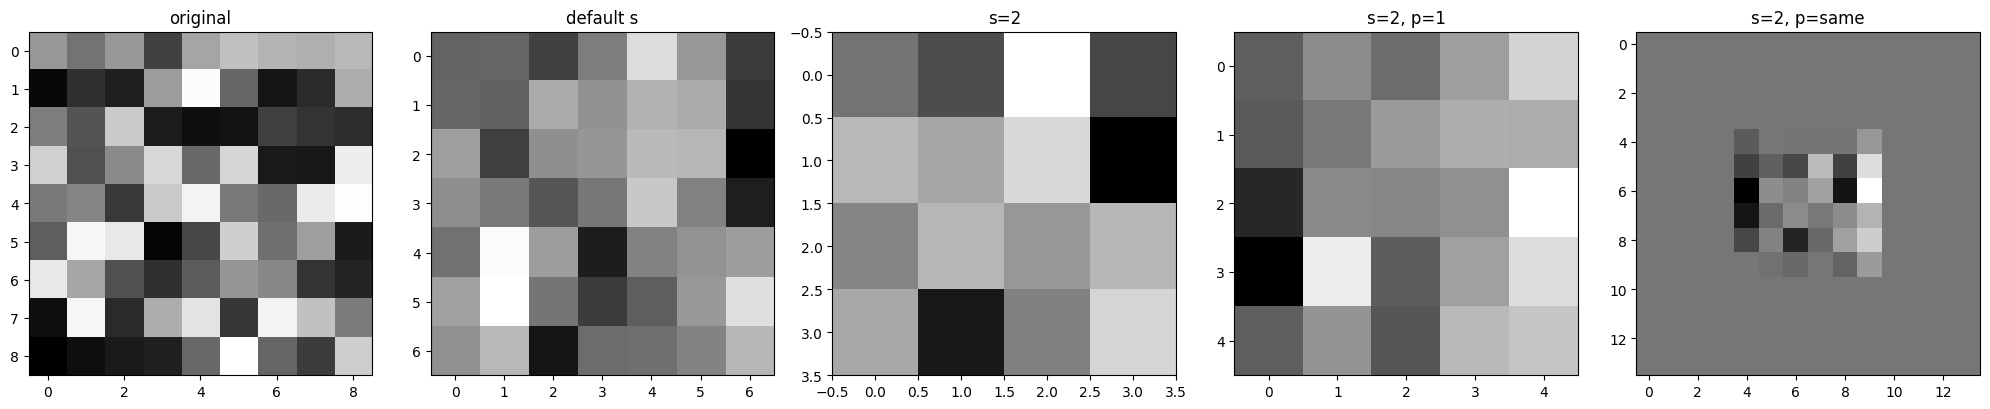

In [8]:
from matplotlib import pyplot as plt

images = [image, z, z_stride2, z_stride2_padding1, z_stride2_padding_same]
labels = ["original", "default s", "s=2", "s=2, p=1", "s=2, p=same"]

n = len(images)
fig, axes = plt.subplots(1, n, figsize=(4 * n, 4))

for ax, i, l in zip(axes, images, labels):
    img_np = i.squeeze().detach().numpy()
    ax.imshow(img_np, cmap="gray")
    ax.set_title(l)

plt.tight_layout()
plt.show()